## EDA Titanic Kedro

### Historia

[RODI-72](https://mercadolibre.atlassian.net/browse/RODI-72)

### Por:
Diego Alvarez

Actualizacion a Kedro: Jose Ricardo Zapata

### Fecha:
2022-08-19 (acctualizacion a Kedro)
2022-08-17 (original)

### Descripción:

EDA del dataset del Titanic


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 50
sns.set_style("whitegrid")

## Load Original Data

Test how to load original data from kedro.

i'm using vscode, is important to select de correct python kernel.

https://kedro.readthedocs.io/en/stable/development/set_up_vscode.html


In [ ]:
catalog.list()

In [ ]:
data = catalog.load('titanic')
data.info()

In [ ]:
data.sample(5)

## Load Split Data

Load data after splitting into train and test sets.

At first sight the Cabin variable could be drop cause the high number of nulls, and also the Fare variable should hold the information related to the cabin (The higher the price the better the cabin). The age has to be analyzed and check if it could be imputed. For Embarked also we have to make an analysis but in a first try those null rows could be dropped.

In [47]:
catalog.list()
train = catalog.load('titanic')
train.info()

[08/19/22 18:16:15] INFO     Loading data from 'titanic' (CSVDataSet)...                        ]8;id=981348;file:///Users/jzapata/opt/anaconda3/envs/titanic-kedro/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=41117;file:///Users/jzapata/opt/anaconda3/envs/titanic-kedro/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [32]:
display(train.describe())
train.describe(exclude=np.number)

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


Just 38% of passengers survived the accident.
The majority of passengers were from class 3.
The average age is 30 yo, with approx 5-month-old baby and 80 yo person as min and max.
The majority of passengers traveled without family
Average fare was 32 USD, with strange value of 0 USD (could be ship crew) Relation with Pclass
Tha majority of passengers where Male.
Age, SibSp, Parch and Fare have outliers
All names are unique
Majority of passengers arrived at the initial point (Southampton) Could use to input missings
Ticket is not unique, strange, but could be one ticket by purchased
Cabin also not unique, but makes sense

## Sex

In [33]:
train['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [34]:
train[['sex','survived']].groupby(['sex']).mean()


,survived
sex,
female,0.727468
male,0.190985


Females are more likely to survive, this could be a first filter/rule to build a heuristic

## PClass

In [35]:
train['pclass'].value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [36]:
train[['pclass','survived']].groupby(['pclass']).mean()

,survived
pclass,
1.0,0.619195
2.0,0.429603
3.0,0.255289


First class passengers (rich ones) are more likely to survive, combined with Sex variable could be a stronger filter.

## Age

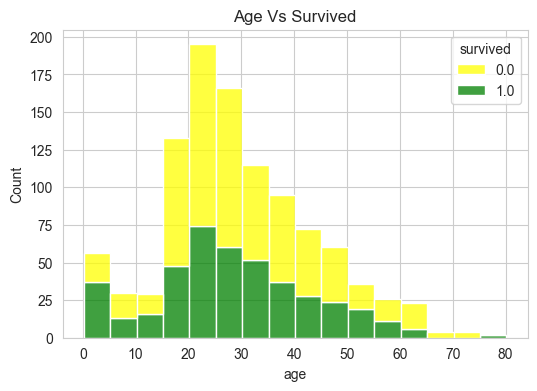

In [37]:
plt.figure(figsize = (6,4))
sns.histplot(data = train , x = 'age' , hue = "survived",binwidth=5,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{'Age'} Vs Survived")

plt.show()

While most passengers are between 15 and 40 years old, the ones below 15 are more likely to survive, this could be because the well known "child and women first", so this feature could be very important with the 2 previous ones.

# Family (SibSp - Parch)
Since this two variables refer to the family of the passengers they could be joined as a unique variable

In [38]:
display(train[['sibsp','survived']].groupby(['sibsp']).mean())
train[['parch','survived']].groupby(['parch']).mean()


,survived
sibsp,
0.0,0.346801
1.0,0.510972
2.0,0.452381
3.0,0.300000
4.0,0.136364
5.0,0.000000
8.0,0.000000


,survived
parch,
0.0,0.335329
1.0,0.588235
2.0,0.504425
3.0,0.625000
4.0,0.166667
5.0,0.166667
6.0,0.000000
9.0,0.000000


Separately they don't show a clear relationship with the target variable, but could be used to generate new valuable features

## Embarked

In [39]:
train['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [40]:
train[['embarked','survived']].groupby(['embarked']).mean()

,survived
embarked,
C,0.555556
Q,0.357724
S,0.332604


There's some kind of relationship but gotta check further by combining with other relevant features

## Fare

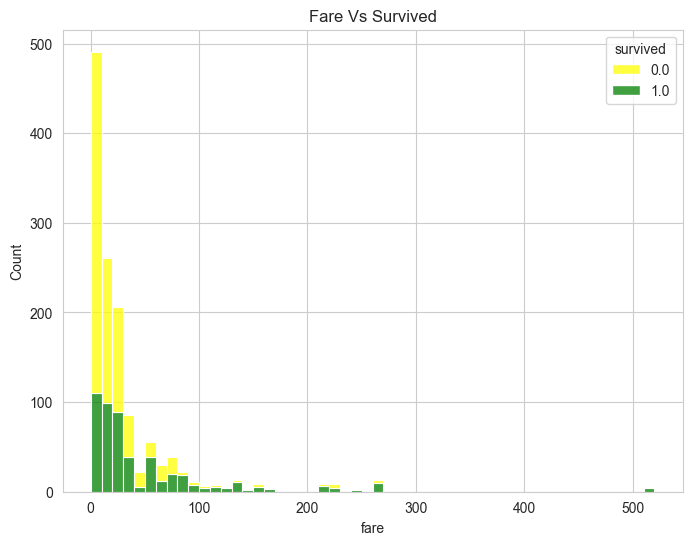

In [41]:
plt.figure(figsize = (8,6))
sns.histplot(data = train , x = 'fare' , hue = "survived",binwidth=10,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title("Fare Vs Survived")

plt.show()


The higher the price of the ticket the probability to survive, this, as said before, could be related to the class of the ticket

## Multivariate Analysis

In [42]:
train[['sex','pclass','survived']].groupby(['sex','pclass']).mean()


survived 
 
 
 sex 
 pclass 
 
 
 
 
 
 female 
 1.0 
 0.965278 
 
 
 2.0 
 0.886792 
 
 
 3.0 
 0.490741 
 
 
 male 
 1.0 
 0.340782 
 
 
 2.0 
 0.146199 
 
 
 3.0 
 0.152130

In [49]:
train = train.dropna(subset='sex')
train['sexint'] = train['sex'].map( {'female': 1, 'male': 0} ).astype(int)

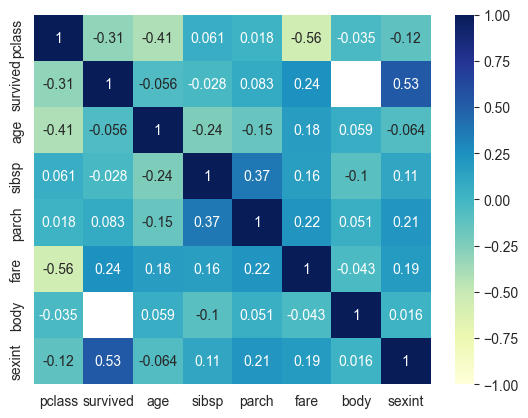

In [50]:
train['sexint'] = train['sex'].map( {'female': 1, 'male': 0} ).astype(int)
sns.heatmap(train.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu', vmin=-1, vmax=1)

In [51]:
train['survivedpred'] = 0
train.loc[(train['sex']=='female') & (train['pclass']<3), 'survivedpred'] = 1
train.loc[(train['age']<=5), 'survivedpred'] = 1
train.loc[(train['age']>=10) & (train['age']<=15), 'survivedpred'] = 1
train[['survived','survivedpred']].describe()


,survived,survivedpred
count,1309.000000,1309.000000
mean,0.381971,0.247517
std,0.486055,0.431735
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(train['survived'],train['survivedpred'])


0.786096256684492